In [1]:
from lightgbm import LGBMRegressor
import pandas as pd
from typing import Dict, Tuple
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import logging
from sklearn.model_selection import GridSearchCV



In [1]:
catalog.list()

[
    'companies',
    'processed_xml_enfermedades',
    'processed_enfermedades',
    'reviews',
    'shuttles',
    'preprocessed_companies',
    'preprocessed_shuttles',
    'model_input_table',
    'regressor',
    'X_train',
    'y_train',
    'X_test',
    'y_test',
    'parameters',
    'params:processing_options',
    'params:processing_options.path',
    'params:model_options',
    'params:model_options.test_size',
    'params:model_options.random_state',
    'params:model_options.target',
    'params:model_options.max_depth',
    'params:model_options.n_estimators',
    'params:model_options.learning_rate',
    'params:model_options.features'
]

In [7]:
df=catalog.load('model_input_table')

[03/09/23 10:21:13] INFO     Loading data from 'model_input_table' (ParquetDataSet)...          ]8;id=792202;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=195950;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [4]:
df_enfermedades=catalog.load('processed_enfermedades')
df_enfermedades.head(10)

[03/15/23 10:52:20] INFO     Loading data from 'processed_enfermedades' (CSVDataSet)...         ]8;id=595352;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=181058;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

,Enfermedad,Sintoma,Frecuencia
0,Enfermedad de Alexander,Macrocephaly,Muy frecuente (99-80%)
1,Enfermedad de Alexander,Intellectual disability,Muy frecuente (99-80%)
2,Enfermedad de Alexander,Seizure,Muy frecuente (99-80%)
3,Enfermedad de Alexander,Spasticity,Muy frecuente (99-80%)
4,Enfermedad de Alexander,Agenesis of corpus callosum,Muy frecuente (99-80%)
5,Enfermedad de Alexander,Hyperreflexia,Muy frecuente (99-80%)
6,Enfermedad de Alexander,Megalencephaly,Muy frecuente (99-80%)
7,Enfermedad de Alexander,Failure to thrive,Muy frecuente (99-80%)
8,Enfermedad de Alexander,Frontal bossing,Muy frecuente (99-80%)
9,Enfermedad de Alexander,Nausea and vomiting,Muy frecuente (99-80%)


In [8]:
df.head(10)

,id_x,shuttle_location,shuttle_type,engine_type,engine_vendor,engines,passenger_capacity,cancellation_policy,crew,d_check_complete,...,review_scores_crew,review_scores_location,review_scores_price,number_of_reviews,reviews_per_month,id_y,company_rating,company_location,total_fleet_count,iata_approved
0,63561,Niue,Type V5,Quantum,ThetaBase Services,1.0,2,strict,1.0,False,...,10.0,9.0,10.0,133,1.65,35029,1.0,Niue,4.0,False
1,63561,Niue,Type V5,Quantum,ThetaBase Services,1.0,2,strict,1.0,False,...,10.0,9.0,10.0,133,1.65,35029,1.0,Niue,4.0,False
2,63561,Niue,Type V5,Quantum,ThetaBase Services,1.0,2,strict,1.0,False,...,10.0,9.0,10.0,133,1.65,35029,1.0,Niue,4.0,False
3,63561,Niue,Type V5,Quantum,ThetaBase Services,1.0,2,strict,1.0,False,...,10.0,9.0,10.0,133,1.65,35029,1.0,Niue,4.0,False
4,53260,Niue,Type V5,Quantum,"Banks, Wood and Phillips",1.0,2,strict,1.0,False,...,10.0,9.0,10.0,37,0.48,35029,1.0,Niue,4.0,False
5,53260,Niue,Type V5,Quantum,"Banks, Wood and Phillips",1.0,2,strict,1.0,False,...,10.0,9.0,10.0,37,0.48,35029,1.0,Niue,4.0,False
6,53260,Niue,Type V5,Quantum,"Banks, Wood and Phillips",1.0,2,strict,1.0,False,...,10.0,9.0,10.0,37,0.48,35029,1.0,Niue,4.0,False
7,53260,Niue,Type V5,Quantum,"Banks, Wood and Phillips",1.0,2,strict,1.0,False,...,10.0,9.0,10.0,37,0.48,35029,1.0,Niue,4.0,False
8,51019,Niue,Type V5,Quantum,ThetaBase Services,1.0,2,flexible,1.0,False,...,10.0,9.0,9.0,10,0.15,35029,1.0,Niue,4.0,False
9,51019,Niue,Type V5,Quantum,ThetaBase Services,1.0,2,flexible,1.0,False,...,10.0,9.0,9.0,10,0.15,35029,1.0,Niue,4.0,False


In [9]:
X_train=catalog.load('X_train')

[03/09/23 10:26:15] INFO     Loading data from 'X_train' (PickleDataSet)...                     ]8;id=434476;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=451274;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [10]:
y_train=catalog.load('y_train')

[03/09/23 10:26:28] INFO     Loading data from 'y_train' (PickleDataSet)...                     ]8;id=57271;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=986270;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

In [12]:
y_train.head(10)

150544     2950.0
508525     5290.0
914264     3418.0
1533279    2885.0
1097861    2846.0
141114     2430.0
154690     1975.0
608456     5186.0
502225     5004.0
649379     4458.0
Name: price, dtype: float64

In [13]:
def train_linear_regression_model(X_train: pd.DataFrame, y_train: pd.Series) -> LinearRegression:
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    return regressor

In [15]:
lr=train_linear_regression_model(X_train, y_train)

In [16]:
lr

LinearRegression()

In [17]:
def evaluate_model(regressor: LinearRegression):
    X_test=catalog.load('X_test')
    y_test=catalog.load('y_test')
    y_pred = regressor.predict(X_test)
    score = r2_score(y_test, y_pred)  #Correlacion
    print('Model has a coefficient R^2 of %.3f on test data.' %score)
    

In [18]:
evaluate_model(lr)

[03/09/23 10:33:43] INFO     Loading data from 'X_test' (PickleDataSet)...                      ]8;id=416490;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=98696;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'y_test' (PickleDataSet)...                      ]8;id=778571;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=456743;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

Model has a coefficient R^2 of 0.462 on test data.


In [19]:
def train_random_forest_regression_model(X_train: pd.DataFrame, y_train: pd.Series) -> RandomForestRegressor:
    var_max_depth= catalog.load('params:model_options.max_depth')
    rf_regressor = RandomForestRegressor(max_depth=var_max_depth)
    rf_regressor.fit(X_train, y_train)
    return rf_regressor

In [20]:
fr=train_random_forest_regression_model(X_train, y_train)

[03/09/23 10:35:09] INFO     Loading data from 'params:model_options.max_depth'                 ]8;id=128152;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=926277;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\
                             (MemoryDataSet)...                                                                    

In [21]:
fr

RandomForestRegressor(max_depth=25)

In [22]:
evaluate_model(fr)

[03/09/23 10:37:26] INFO     Loading data from 'X_test' (PickleDataSet)...                      ]8;id=365567;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=914147;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'y_test' (PickleDataSet)...                      ]8;id=96383;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=43441;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

Model has a coefficient R^2 of 0.797 on test data.


In [35]:
params={'max_depth':5, 'n_estimators': 1000, 'learning_rate': 0.05}

In [36]:
def train_lgbm_regression_model(X_train: pd.DataFrame, y_train: pd.Series, params:Dict) -> LGBMRegressor:
    
    lgbm_regressor = LGBMRegressor(**params)
    lgbm_regressor.fit(X_train, y_train)
    return lgbm_regressor

In [40]:
lgbm=train_lgbm_regression_model(X_train, y_train,params)

In [41]:
lgbm

LGBMRegressor(learning_rate=0.05, max_depth=5, n_estimators=1000)

In [42]:
evaluate_model(lgbm)

[03/09/23 10:52:40] INFO     Loading data from 'X_test' (PickleDataSet)...                      ]8;id=528246;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=554278;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'y_test' (PickleDataSet)...                      ]8;id=739950;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=420699;file:///opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

Model has a coefficient R^2 of 0.744 on test data.


In [28]:
params_grid = { 
    'max_depth': [15, 20, 25,30]
}

In [29]:
reg_test=GridSearchCV (RandomForestRegressor(), param_grid=params_grid )

In [30]:
reg_test.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20, 25, 30]})

In [38]:
reg_test.best_params_

{'max_depth': 30}

In [39]:
reg_test.best_score_

0.7938580231670549

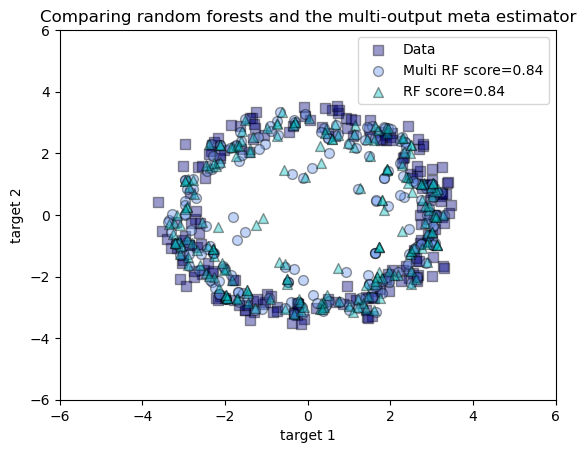

In [1]:
# Author: Tim Head <betatim@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += 0.5 - rng.rand(*y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=400, test_size=200, random_state=4
)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
)
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(
    y_test[:, 0],
    y_test[:, 1],
    edgecolor="k",
    c="navy",
    s=s,
    marker="s",
    alpha=a,
    label="Data",
)
plt.scatter(
    y_multirf[:, 0],
    y_multirf[:, 1],
    edgecolor="k",
    c="cornflowerblue",
    s=s,
    alpha=a,
    label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test),
)
plt.scatter(
    y_rf[:, 0],
    y_rf[:, 1],
    edgecolor="k",
    c="c",
    s=s,
    marker="^",
    alpha=a,
    label="RF score=%.2f" % regr_rf.score(X_test, y_test),
)
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

In [2]:
X_train

array([[ 2.45853846e+00],
       [-5.83611123e+01],
       [-9.68933449e+01],
       [ 1.56779229e+01],
       [-3.77111572e+01],
       [ 5.97207182e+01],
       [-7.13988343e+01],
       [ 1.01896438e+01],
       [ 9.21416083e+00],
       [ 4.77922713e+00],
       [ 2.83132418e+01],
       [ 5.65498830e+01],
       [-9.99195950e+01],
       [-3.54638006e+01],
       [ 1.73666681e+01],
       [-8.12845808e+01],
       [-7.51458076e+01],
       [-6.36774297e+01],
       [ 1.55714431e+01],
       [ 6.32703024e+01],
       [ 1.85023738e+01],
       [-4.38549866e+00],
       [-7.27089549e+01],
       [-9.38101987e+01],
       [ 1.78611074e+01],
       [-6.69291606e+01],
       [-3.14622184e+01],
       [ 5.10164377e+01],
       [-5.34051452e+01],
       [-3.09405077e+01],
       [-9.47578026e+01],
       [-6.64033414e+01],
       [ 8.98978517e+01],
       [-4.59583476e+01],
       [-6.99970369e+00],
       [-7.13153903e+01],
       [ 5.09722963e+01],
       [-8.28323726e+00],
       [-5.0

In [3]:
# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

In [7]:
y_multirf

array([[-3.29854846e-01,  3.07077430e+00],
       [-3.41538722e-01, -1.74303529e+00],
       [ 1.92984122e+00,  1.43033883e+00],
       [ 3.02156371e+00,  5.76824911e-01],
       [-3.94981296e-01, -2.82826924e+00],
       [ 2.73125891e+00, -9.60095918e-01],
       [-2.32753131e+00, -2.16200066e+00],
       [ 1.55997152e+00, -2.36233453e+00],
       [-3.35543000e+00, -1.59869539e-01],
       [ 2.99558015e+00, -1.96399286e-01],
       [ 3.09446614e+00,  1.30148780e-02],
       [-2.28689131e+00, -1.23933084e+00],
       [ 7.80939086e-01, -2.83430986e+00],
       [-7.49609987e-01,  3.03869408e+00],
       [-2.28674675e+00, -1.23983305e+00],
       [-1.96904147e+00, -2.71836568e+00],
       [ 3.02243794e+00, -9.69861737e-01],
       [ 3.88415825e-01,  2.83691803e+00],
       [ 1.84977421e+00,  1.20715469e+00],
       [-2.33675876e+00,  2.29725059e+00],
       [ 2.45510288e+00, -4.72718522e-01],
       [-1.19657099e+00,  2.54173664e+00],
       [ 1.84277439e+00,  2.84556536e+00],
       [-3.

In [8]:
y_rf

array([[-3.08936406e-01,  3.02660425e+00],
       [-5.55903095e-01, -1.59428840e+00],
       [ 1.90460318e+00,  1.47033352e+00],
       [ 2.99832337e+00,  6.18085656e-01],
       [-2.21067556e-01, -2.72016209e+00],
       [ 2.50896921e+00, -1.17573923e+00],
       [-2.26583962e+00, -2.00682580e+00],
       [ 1.40842092e+00, -2.28295636e+00],
       [-3.24681075e+00, -2.62355179e-01],
       [ 2.87272154e+00, -5.75007906e-01],
       [ 3.11013897e+00, -5.81324558e-02],
       [-2.30442113e+00, -1.11698302e+00],
       [ 7.62477019e-01, -2.80941101e+00],
       [-7.56041079e-01,  2.99599722e+00],
       [-2.30413201e+00, -1.11798743e+00],
       [-1.94936293e+00, -2.71235730e+00],
       [ 3.12800765e+00, -9.85968364e-01],
       [ 4.28817089e-01,  2.79381156e+00],
       [ 1.92270046e+00,  1.49972490e+00],
       [-2.37851030e+00,  2.28854022e+00],
       [ 2.29149431e+00, -5.23656019e-01],
       [-1.32036252e+00,  2.52700130e+00],
       [ 1.69129248e+00,  2.74549858e+00],
       [-3.

Model has a coefficient R^2 of 0.717 on test data.
